### Risk Analysis Across Provinces

This analysis compares claims frequency between two groups based on province:

1. **Data Loading**: Load the dataset into a Pandas DataFrame.
2. **Group Selection**:
   - **Group A (Control)**: Policies from the lower-risk province 'Gauteng'.
   - **Group B (Test)**: Policies from the higher-risk province 'Western Cape'.
3. **Verification**: Check group sizes and for null values.
4. **Claims Frequency Calculation**: Compute claims frequency as total claims divided by total premium.
5. **Statistical Comparison**: Perform a t-test to compare total claims between the two groups.
6. **Hypothesis Testing**: Decide to reject or fail to reject the null hypothesis based on the p-value.
7. **Visualization**: Create histograms to visualize total claims distribution.

The following code implements these steps to analyze risk differences across provinces.


In [17]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dataset.csv')

# Check for null values
df.isnull().sum()

# Preview the dataset
df.head()

C:\Users\biement fanteye\AppData\Local\Temp\ipykernel_20164\1026256002.py:8: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset.csv')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [18]:
# Group A (Control): Select policies from provinces that are considered lower-risk (example: 'Gauteng')
group_a = df[df['Province'] == 'Gauteng']

# Group B (Test): Select policies from provinces that are considered higher-risk (example: 'Western Cape')
group_b = df[df['Province'] == 'Western Cape']

# Verify the sizes of the groups
print(f"Group A size: {group_a.shape}")
print(f"Group B size: {group_b.shape}")

Group A size: (393865, 52)
Group B size: (170796, 52)


In [19]:
# Function to calculate Claims Frequency
def calculate_claims_frequency(group):
    total_premium = group['TotalPremium'].sum()
    total_claims = group['TotalClaims'].sum()
    claims_frequency = total_claims / total_premium
    return claims_frequency

# Calculate Claims Frequency for Group A and Group B
claims_frequency_a = calculate_claims_frequency(group_a)
claims_frequency_b = calculate_claims_frequency(group_b)

print(f"Claims Frequency - Group A (Control): {claims_frequency_a}")
print(f"Claims Frequency - Group B (Test): {claims_frequency_b}")

Claims Frequency - Group A (Control): 1.2220181234256304
Claims Frequency - Group B (Test): 1.059471955009161


In [20]:
# Perform a t-test to compare the means of the two groups
t_stat, p_value = stats.ttest_ind(group_a['TotalClaims'], group_b['TotalClaims'], equal_var=False)

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check if we reject or accept the null hypothesis
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant risk difference across provinces.")
else:
    print("Fail to reject the null hypothesis: No significant risk difference across provinces.")

T-statistic: 1.8652143496485993
P-value: 0.06215231452280004
Fail to reject the null hypothesis: No significant risk difference across provinces.


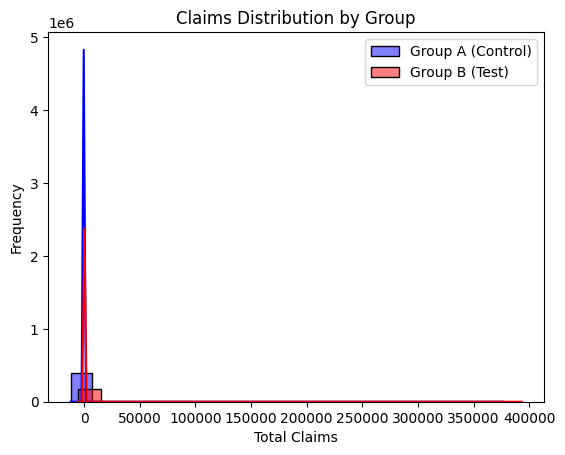

In [21]:

# Plot claims distribution for Group A and Group B
sns.histplot(group_a['TotalClaims'], color='blue', label='Group A (Control)', kde=True)
sns.histplot(group_b['TotalClaims'], color='red', label='Group B (Test)', kde=True)

plt.legend()
plt.title("Claims Distribution by Group")
plt.xlabel("Total Claims")
plt.ylabel("Frequency")
plt.show()

### Analysis of TotalPremium and TotalClaims by Postal Code Group

This analysis examines whether there are significant differences in **TotalPremium** and **TotalClaims** between two groups of postal codes derived from the top 50 most frequent postal codes.

#### Steps:
1. Identify the top 50 postal codes by frequency.
2. Split these postal codes into two groups:
   - Odd indexed (e.g., positions 0, 2, 4)
   - Even indexed (e.g., positions 1, 3, 5)
3. Conduct independent t-tests to compare:
   - **TotalPremium**
   - **TotalClaims**
4. Use a significance level of **α = 0.05** to evaluate the null hypothesis that there is no significant difference.

The following code implements this analysis and presents the results.


In [22]:
from scipy import stats

# Step 1: Find the top 50 postal codes by frequency
top_50_postal_codes = df['PostalCode'].value_counts().head(50).index

# Step 2: Split the top 50 into two groups: odd and even positions
odd_postal_codes = top_50_postal_codes[::2]  # Postal codes at odd positions (index 0, 2, 4, ...)
even_postal_codes = top_50_postal_codes[1::2]  # Postal codes at even positions (index 1, 3, 5, ...)

# Filter the dataset to include only rows from these postal codes
group_odd = df[df['PostalCode'].isin(odd_postal_codes)]
group_even = df[df['PostalCode'].isin(even_postal_codes)]

In [23]:
# Significance level
alpha = 0.05

# Step 3: Perform t-tests to compare the metrics between Odd and Even postal codes
# Example metric: TotalPremium
t_stat_premium, p_value_premium = stats.ttest_ind(group_odd['TotalPremium'], group_even['TotalPremium'], equal_var=False)

# Example metric: TotalClaims
t_stat_claims, p_value_claims = stats.ttest_ind(group_odd['TotalClaims'], group_even['TotalClaims'], equal_var=False)

# Step 4: Output results with decision to accept/reject the null hypothesis
def hypothesis_test(p_value, alpha=0.05):
    if p_value < alpha:
        return "Reject the null hypothesis: There is a significant difference."
    else:
        return "Fail to reject the null hypothesis: No significant difference."

print(f"Comparison of TotalPremium between odd and even indexed postal codes:")
print(f"T-statistic: {t_stat_premium}, P-value: {p_value_premium}")
print(hypothesis_test(p_value_premium, alpha))

print(f"\nComparison of TotalClaims between odd and even indexed postal codes:")
print(f"T-statistic: {t_stat_claims}, P-value: {p_value_claims}")
print(hypothesis_test(p_value_claims, alpha))

Comparison of TotalPremium between odd and even indexed postal codes:
T-statistic: -1.7747287006573247, P-value: 0.07594331587208471
Fail to reject the null hypothesis: No significant difference.

Comparison of TotalClaims between odd and even indexed postal codes:
T-statistic: -1.4426328589621789, P-value: 0.14912462294944695
Fail to reject the null hypothesis: No significant difference.


### ANOVA Test for Profit Margin Differences Across Zip Codes

In this analysis, we aim to test the null hypothesis:

**H₀**: There are no significant differences in profit margins across different zip codes.

We calculate the profit margin as the difference between `TotalPremium` and `TotalClaims`, and group the data by zip code (PostalCode). An ANOVA (Analysis of Variance) test is then performed to determine if there are statistically significant differences in the average profit margins across zip codes.

If the p-value from the ANOVA test is:
- **p < 0.05**: We reject the null hypothesis and conclude that there are significant differences in profit margins between zip codes.
- **p ≥ 0.05**: We fail to reject the null hypothesis, suggesting no significant differences in profit margins between zip codes.


In [27]:
# Calculate the Profit Margin (TotalPremium - TotalClaims)
df['ProfitMargin'] = df['TotalPremium'] - df['TotalClaims']

# Group by PostalCode and calculate the mean profit margin for each zip code
grouped_data = df.groupby('PostalCode')['ProfitMargin'].apply(list)

# Perform the ANOVA test (if profit margins are normally distributed)
f_value, p_value = stats.f_oneway(*grouped_data)

# Output the F-statistic and p-value
print(f"ANOVA F-value: {f_value}")
print(f"P-value: {p_value}")

# Interpretation of the result
if p_value < 0.05:
    print("Reject the null hypothesis: There are significant differences in profit margins between zip codes.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences in profit margins between zip codes.")


ANOVA F-value: 0.8707474893589257
P-value: 0.9976859758015036
Fail to reject the null hypothesis: There are no significant differences in profit margins between zip codes.


### Hypothesis Testing: Risk Difference between Men and Women

This section conducts hypothesis testing to evaluate whether there is a significant difference in risk between men and women based on claims data.

#### Steps:
1. **T-test**: Compares the average `TotalClaims` (continuous risk) between men and women.
2. **Chi-squared test**: Compares the occurrence of claims (`ClaimMade`) between men and women to assess categorical risk.

#### Hypotheses:
- **Null Hypothesis (H₀)**: There is no significant difference in risk between men and women.
- **Alternative Hypothesis (H₁)**: There is a significant difference in risk between men and women.

#### Outcomes:
- **p-value < 0.05**: Reject H₀, indicating a significant difference.
- **p-value ≥ 0.05**: Fail to reject H₀, indicating no significant difference.


In [25]:

from scipy.stats import ttest_ind, chi2_contingency



# Data cleaning: Remove rows with missing or irrelevant gender information
df_clean = df[df['Gender'].notna()]

# Convert gender to a categorical variable (if not already)
df_clean['Gender'] = df_clean['Gender'].astype('category')

# Step 1: Define risk as TotalClaims
# Remove rows with missing or zero TotalClaims for meaningful analysis
df_risk = df_clean[df_clean['TotalClaims'] > 0]

# Separate data into two groups: Men and Women
group_men = df_risk[df_risk['Gender'] == 'Male']
group_women = df_risk[df_risk['Gender'] == 'Female']

# Step 2: T-test for continuous data (TotalClaims)
t_stat, p_value = ttest_ind(group_men['TotalClaims'], group_women['TotalClaims'], equal_var=False)

# Print t-test results
print(f"T-test p-value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant risk difference between men and women.")
else:
    print("Fail to reject the null hypothesis: No significant risk difference between men and women.")


T-test p-value: 0.5680286951630673
Fail to reject the null hypothesis: No significant risk difference between men and women.


In [26]:
# Step 3: Chi-squared test for categorical data (if you consider claim occurrence)
# Convert TotalClaims to a binary variable: 1 if claim made, 0 otherwise
df_clean['ClaimMade'] = df_clean['TotalClaims'].apply(lambda x: 1 if x > 0 else 0)

# Create a contingency table for chi-squared test
contingency_table = pd.crosstab(df_clean['Gender'], df_clean['ClaimMade'])

# Run chi-squared test
chi2, chi2_p_value, _, _ = chi2_contingency(contingency_table)

# Print Chi-squared test results
print(f"Chi-squared test p-value: {chi2_p_value}")
if chi2_p_value < 0.05:
    print("Reject the null hypothesis: There is a significant risk difference between men and women.")
else:
    print("Fail to reject the null hypothesis: No significant risk difference between men and women.")


Chi-squared test p-value: 0.003993781054238153
Reject the null hypothesis: There is a significant risk difference between men and women.


#### Interpretation:
Based on the Chi-squared test, men and women have different likelihoods of making a claim.
However, the T-test shows that when claims are made, the total amount of claims does not significantly differ between genders.
This implies that gender may influence the frequency of claims but not necessarily the severity or amount of claims.